### Implementación modelo Deep Learning - Redes convolutivas

En la era digital, la identificación precisa de dibujos de números se ha convertido en un pilar esencial para diversos campos, desde la seguridad hasta la inteligencia artificial. Bajo esta línea los algoritmos de predicción, especialmente las redes convolutivas, desempeñan un papel crucial.

Se puede asociar de manera directa con la seguridad y la necesidad de reconocer y validar la autenticidad de dibujos numéricos. Aquí, las redes convolutivas juegan un papel crucial, capaces de escrutar cada trazo para identificar la autenticidad de la representación numérica.

En el ámbito de la seguridad, la identificación precisa de dibujos de números es esencial para sistemas de autenticación biométrica, acceso a bases de datos sensibles o incluso la prevención de fraudes. Las redes convolutivas, inspiradas en la estructura visual del cerebro humano, demuestran una eficiencia excepcional al analizar y aprender patrones complejos, permitiendo una identificación confiable de dibujos numéricos en entornos diversos.


A continuación mostramos un algoritmos que predice o identifica los números dibujados por una persona.

In [43]:
#Importacion de librerias para poder trabajar
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import to_categorical

# Cargamos los datos de MNIST
# Los datos son imágenes de dígitos escritos a mano y sus respectivas etiquetas.
#Dividimos en entrenamiento y prueba y lo cargamos
(X_Train, Y_Train), (X_Prueba, Y_Prueba) = mnist.load_data()


In [50]:
# Ajustar la forma de las imágenes para que puedan ser aceptadas (1, 28, 28, 1)
X_Train = X_Train.reshape(X_Train.shape[0], 28, 28, 1)
X_Prueba = X_Prueba.reshape(X_Prueba.shape[0], 28, 28, 1)

# Hacer 'one-hot encoding' de los resultados
# Representar las clases (dígitos del 0 al 9).
Y_Train = to_categorical(Y_Train)
Y_Prueba = to_categorical(Y_Prueba)


# Convertir las imágenes a valores tipo float y normalizar dividiendo por 255.

X_Train = X_Train.astype('float32') / 255
X_Prueba = X_Prueba.astype('float32') / 255


## Datos

El conjunto de datos MNIST es un conjunto que viene justo para empezar en el manejo de este tipo de programas.

-El conjunto de datos MNIST proviene del Instituto Nacional de Estándares y Tecnología (NIST) de EE. UU.

-Consiste en un conjunto de 70,000 imágenes en escala de grises de dígitos escritos a mano del 0 al 9. Está dividido en dos conjuntos: uno de entrenamiento con 60,000 imágenes y otro de prueba con 10,000 imágenes.

- Cada imagen es de tamaño 28x28 píxeles, lo que da un total de 784 píxeles por imagen. Estas imágenes están normalizadas y centradas.

- Cada imagen está etiquetada con el dígito que representa, lo que significa que hay 10 clases en total (dígitos del 0 al 9).


Las Redes Neuronales Convolucionales (CNN, Convolutional Neural Networks en inglés) son un tipo de modelo de aprendizaje profundo especialmente diseñado para procesar datos estructurados en forma de mallas, como imágenes y datos 3D.

Reconoce y clasifica patrones en datos visuales, pero también se utilizan en una amplia gama de aplicaciones de procesamiento de secuencias y datos espaciales.


1. **Capas convolucionales**: Las capas convolucionales son el corazón de las CNN. Estas capas aplican filtros o kernels a pequeñas regiones del o los inputs, realizando operaciones de convolución. Cada filtro aprende a detectar características específicas, como bordes, texturas o patrones simples en las imágenes.

2. **Capas de pooling**: Después de las capas convolucionales, es común usar capas de pooling, como MaxPooling en este caso, se busca reducir la dimensionalidad de las representaciones, conservando las características más relevantes. Estas capas ayudan a reducir el sobreajuste.

3. **Función de activación**: Utilizaremos la función de activación ReLU (Rectified Linear Unit) para introducir no linealidad en la red. Esto ayuda en la capacidad de aprendizaje de las redes y acelera el proceso de entrenamiento.

4. **Regularización**: Aplicaremos técnicas de regularización como Dropout para reducir este problema.


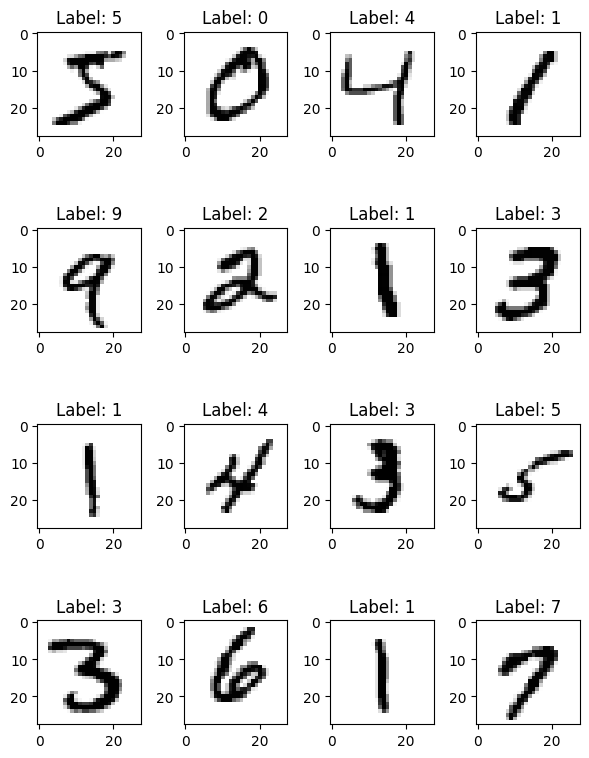

In [52]:
#Ver mis imágenes contenidas
import matplotlib.pyplot as plt
F = 4
C = 4
num = F*C
imagenes = X_Train[0:num]
etiquetas = Y_Train[0:num]
fig, axes = plt.subplots(F, C, figsize=(1.5*C,2*F))
for i in range(num):
     ax = axes[i//C, i%C]
     ax.imshow(imagenes[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(etiquetas[i])))
plt.tight_layout()
plt.show()

## Ajustes

En este momento ya teníamos un modleo base, sin embargo al hacer determinada spruebas nos dimos cuentas que los tamaños siempre eran muy similares, y al nosotros dibujar un npumero más grande o más pequeño, el modelo no funcionaba bien, por lo que se tomó la decisión de hacer Data Augmentation para poder mejorar el entrenamiento del modelo

In [53]:
#Aumento de datos
#utilizando ImageDataGenerator de keras


from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definición de variables para realizar transformaciones
Rotar = 30  # Rango de rotación en grados
ancho = 0.25  # Rango de desplazamiento horizontal
alto = 0.25  # Rango de desplazamiento vertical
zoom = [0.5, 1.5]  # Rango de zoom

# Crear una instancia de ImageDataGenerator con las transformaciones definidas
dataFinal = ImageDataGenerator(
    rotation_range=Rotar,
    width_shift_range=ancho,
    height_shift_range=alto,
    zoom_range=zoom
)

# Aplicar el ajuste a los datos de entrenamiento
dataFinal.fit(X_Train)


El aumento de datos utilizando `ImageDataGenerator` de Keras con transformaciones como rotación, desplazamiento y zoom tiene varias ventajas.

**1.- Aumenta la cantidad de datos**: Generar *nuevas* imágenes a partir de las existentes aumenta la cantidad de datos disponibles para el entrenamiento. Así nuestro modelo aprende de mnaera un poco más variada

**2.- Mejora la generalización**: Al exponer al modelo a diferentes variaciones de las imágenes originales, como rotaciones, desplazamientos y zooms, se vuelve más resistente al sobreajuste.

**3.Aumenta la diversidad de datos**: Al aplicar transformaciones, se introducen variaciones que imitan las posibles condiciones del mundo real.

Aplicamos para mejorar el rendimiento y la capacidad de generalización de este modelo.

In [54]:
#Modelo

#Inicializamos


#32 filtros de tamaño (3,3),
#Función de activación ReLU
#Imágenes de 28x28 píxeles en escala de grises.
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2), #Agrega una capa de pooling con un tamaño de ventana de (2,2)
    #Extraigo así, las características más importantes de las impagenes


    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #Agrego una capa de regularización para reducir el sobreajuste,
    #Desactivo aleatoriamente el 50% de las neuronas durante el entrenamiento.

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")#Última capa (softmax) con 10 neuronas correspondientes a las 10 clases de dígitos.
])



#Compilación
modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
#Datos de entrenamiento salen
dataTrain = dataFinal.flow(X_Train, Y_Train, batch_size=32)

In [ ]:
TAMANO_LOTE = 32

#Entrenar la red. Toma un buen rato! Ve por un café ;)
#Oye suscribete al canal!
print("Entrenando modelo...");
epocas=60
history = modelo.fit(
    dataTrain,
    epochs=epocas,
    batch_size=TAMANO_LOTE,
    validation_data=(X_Prueba, Y_Prueba),
    steps_per_epoch=int(np.ceil(60000 / float(TAMANO_LOTE))),
    validation_steps=int(np.ceil(10000 / float(TAMANO_LOTE)))
)

print("Modelo entrenado!");

Entrenando modelo...
Epoch 1/60
1875/1875 [==============================] - 32s 15ms/step - loss: 2.3015 - accuracy: 0.1114 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 2/60
1875/1875 [==============================] - 28s 15ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/60
1875/1875 [==============================] - 28s 15ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/60
1875/1875 [==============================] - 30s 16ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/60
1875/1875 [==============================] - 32s 17ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 6/60
1875/1875 [==============================] - 32s 17ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 7/60
1875/1875 [==============================] - 29s 15ms/step - loss: 2.3013 - accuracy: 0.1124

In [4]:
#Exportar el modelo al explorador!
modelo.save('numeros_conv_ad_do.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
#Esta fue la primera prueba se prueba ocn distintas imágenes pero subiendolas, no directamente dibuajdo
#lo cual puede estra un poco sesgado y esto se mejorara para la siguiente entrega
import numpy as np
from PIL import Image

# Cargar y preprocesar tu imagen dibujada (Las imágenes las dibujaba en powerpoint)
imagen_dibujada = Image.open("6.jpeg").convert("L")  # Convierto a escala de grises
imagen_dibujada = imagen_dibujada.resize((28, 28))  # Ajusto al tamaño de entrada de la red
imagen_dibujada = np.asarray(imagen_dibujada)  # Convierto a un array de NumPy
imagen_dibujada = imagen_dibujada / 255.0  # Normalizo los valores de píxeles


imagen_dibujada = tf.expand_dims(imagen_dibujada, axis=0)

# Realizo la predicción
prediccion = modelo.predict(imagen_dibujada)

# Obtengo la clase predicha
clase_predicha = np.argmax(prediccion)

# Lo muestro
print("Clase predicha:", clase_predicha)

1/1 [==============================] - 0s 139ms/step
Clase predicha: 8


In [8]:
#Todo este código presentará mejoras pero ya es para que el usuario pueda inetractuar y dibujar
!pip install ipywidgets
from IPython.display import display, HTML, Javascript
import ipywidgets as widgets
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf


def draw_and_predict(model, canvas_output):
    # Guardar la imagen dibujada en un como pizarron
    plt.savefig("input_image.png", bbox_inches='tight', pad_inches=0.1)

    # Cargo mi dibujo
    imagen_dibujada = np.array(Image.open("input_image.png").convert("L").resize((28, 28))) / 255.0
    imagen_dibujada = tf.expand_dims(imagen_dibujada, axis=0)

    # Manod mi prediccion
    prediccion = model.predict(imagen_dibujada)

    # Obtengo resultado
    clase_predicha = np.argmax(prediccion)

    print("Clase predicha:", clase_predicha)


canvas = widgets.Output(width=400, height=400, background_color='white')

# HTML y JavaScript para "manejar" el dibujo en el lienzo
draw_html = """
<canvas id="canvas" width="400" height="400" style="border:1px solid #000;"></canvas>
<script>
var canvas = document.getElementById('canvas');
var ctx = canvas.getContext('2d');
var drawing = false;

// Aumenta el grosor de línea
ctx.lineWidth = 15;

canvas.addEventListener('mousedown', function(e) {
    drawing = true;
    ctx.beginPath();
    ctx.moveTo(e.clientX - canvas.getBoundingClientRect().left, e.clientY - canvas.getBoundingClientRect().top);
});

canvas.addEventListener('mousemove', function(e) {
    if (!drawing) return;
    ctx.lineTo(e.clientX - canvas.getBoundingClientRect().left, e.clientY - canvas.getBoundingClientRect().top);
    ctx.stroke();
});

canvas.addEventListener('mouseup', function() {
    drawing = false;
});

canvas.addEventListener('mouseout', function() {
    drawing = false;
});
</script>
"""


display(HTML(draw_html), canvas)

# Botón para realizar la predicción
boton_prediccion = widgets.Button(description="Predecir")
display(boton_prediccion)

# Función a ejecutar al hacer clic en el botón
def on_button_click(b):
    with canvas:
        # Limpiar el lienzo antes de guardar la nueva imagen
        plt.clf()
        # Realizar la predicción con la imagen actual
        draw_and_predict(modelo, canvas)
        # Limpiar el lienzo después de la predicción
        plt.clf()

# Asociar la función al evento de clic del botón
boton_prediccion.on_click(on_button_click)



Output()

Button(description='Predecir', style=ButtonStyle())

<Figure size 640x480 with 0 Axes>